In [7]:
import requests
import random
from time import sleep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
from scipy.cluster.vq import whiten, kmeans2

In [9]:
def call_api(uri):
    json = requests.get(uri, headers={'X-Auth-Token': 'ca62eb2a6f6f44bc9b257f70138ad4d7'}).json()
    return json

In [10]:
def get_cost_value(uri):
    cost = requests.get(uri, headers={'X-Auth-Token': 'ca62eb2a6f6f44bc9b257f70138ad4d7'}).json()
    return cost

In [11]:
teams = call_api('http://api.football-data.org/v1/competitions/439/leagueTable')

In [12]:
team_for_pd = list()
for x in range(len(teams['standing'])):

    team_name = teams['standing'][x]['teamName']
    team_losses = teams['standing'][x]['losses']
    team_wins = teams['standing'][x]['wins']

    team_cost_link = get_cost_value(teams['standing'][x]['_links']['team']['href'])
    if team_cost_link['squadMarketValue'] is None:
        team_cost = (random.randrange(288651478, 1032156791, 1325647))
    else:
        team_cost = team_cost_link['squadMarketValue']

    team_for_pd.append({'name': team_name, 'losses': team_losses, 'wins': team_wins, 'cost': team_cost})
    sleep(1)

team_for_pd

[{'cost': 495452410, 'losses': 2, 'name': 'SL Benfica', 'wins': 25},
 {'cost': 756604869, 'losses': 2, 'name': 'FC Porto', 'wins': 22},
 {'cost': 801676867, 'losses': 6, 'name': 'Sporting CP', 'wins': 21},
 {'cost': 388075003, 'losses': 8, 'name': 'Vitoria Guimaraes', 'wins': 19},
 {'cost': 563060407, 'losses': 10, 'name': 'Sporting Braga', 'wins': 15},
 {'cost': 740697105, 'losses': 10, 'name': 'Maritimo Funchal', 'wins': 13},
 {'cost': 553780878, 'losses': 13, 'name': 'FC Rio Ave', 'wins': 14},
 {'cost': 718161106, 'losses': 14, 'name': 'Feirense', 'wins': 13},
 {'cost': 791071691, 'losses': 11, 'name': 'Boavista Porto FC', 'wins': 10},
 {'cost': 625365816, 'losses': 16, 'name': 'GD Estoril Praia', 'wins': 10},
 {'cost': 369515945, 'losses': 13, 'name': 'G.D. Chaves', 'wins': 8},
 {'cost': 670437814, 'losses': 16, 'name': 'Vitoria Setubal', 'wins': 9},
 {'cost': 826864160, 'losses': 14, 'name': 'FC Paços de Ferreira', 'wins': 8},
 {'cost': 825538513, 'losses': 16, 'name': 'C.F. Os Be

In [13]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,cost,losses,name,wins
0,495452410,2,SL Benfica,25
1,756604869,2,FC Porto,22
2,801676867,6,Sporting CP,21
3,388075003,8,Vitoria Guimaraes,19
4,563060407,10,Sporting Braga,15
5,740697105,10,Maritimo Funchal,13
6,553780878,13,FC Rio Ave,14
7,718161106,14,Feirense,13
8,791071691,11,Boavista Porto FC,10
9,625365816,16,GD Estoril Praia,10


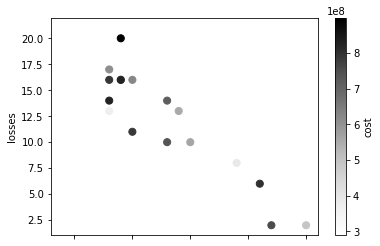

In [14]:
teams_pd.plot.scatter(x='wins', y='losses', c='cost', s=50)

In [15]:
teams_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
cost      18 non-null int64
losses    18 non-null int64
name      18 non-null object
wins      18 non-null int64
dtypes: int64(3), object(1)
memory usage: 656.0+ bytes


In [16]:
del teams_pd['wins']
del teams_pd['name']
teams_pd

,cost,losses
0,495452410,2
1,756604869,2
2,801676867,6
3,388075003,8
4,563060407,10
5,740697105,10
6,553780878,13
7,718161106,14
8,791071691,11
9,625365816,16


In [17]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[2.88128672, 0.37928372],
       [4.40001001, 0.37928372],
       [4.66212468, 1.13785117],
       [2.25683704, 1.5171349 ],
       [3.27445874, 1.89641862],
       [4.30749894, 1.89641862],
       [3.22049395, 2.46534421],
       [4.1764416 , 2.65498607],
       [4.60045064, 2.08606049],
       [3.63679374, 3.0342698 ],
       [2.14890747, 2.46534421],
       [3.89890841, 3.0342698 ],
       [4.80860053, 2.65498607],
       [4.80089128, 3.0342698 ],
       [4.6081599 , 3.0342698 ],
       [3.55970118, 3.22391166],
       [5.22490032, 3.79283725],
       [1.6786429 , 3.98247911]])

In [19]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[1.6786429 , 3.98247911],
        [3.39395219, 1.5171349 ],
        [4.3683164 , 2.94998453]]),
 array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0]))

In [20]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'b',
 'b',
 'b',
 'g',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r']

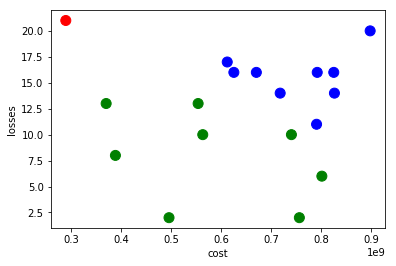

In [21]:
teams_pd.plot.scatter(x='cost', y='losses', c=colors, s=100)

In [25]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[4.36223465, 2.84462794],
        [4.53106734, 0.75856745],
        [2.88128672, 0.37928372],
        [2.7251743 , 2.08606049],
        [1.6786429 , 3.98247911]]),
 array([2, 1, 1, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4]))

In [26]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'g',
 'g',
 'y',
 'y',
 'r',
 'y',
 'r',
 'r',
 'r',
 'y',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'm']

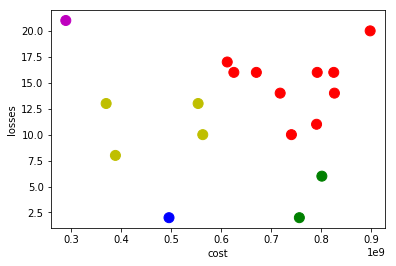

In [27]:
teams_pd.plot.scatter(x='cost', y='losses', c=colors, s=100)